<a href="https://colab.research.google.com/github/Damntoochill/Learning-ML/blob/master/Statistics/stationarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [2]:
#upload data
from google.colab import files
files.upload()

Saving AirPassengers.csv to AirPassengers.csv


{'AirPassengers.csv': b'Month,#Passengers\n1949-01,112\n1949-02,118\n1949-03,132\n1949-04,129\n1949-05,121\n1949-06,135\n1949-07,148\n1949-08,148\n1949-09,136\n1949-10,119\n1949-11,104\n1949-12,118\n1950-01,115\n1950-02,126\n1950-03,141\n1950-04,135\n1950-05,125\n1950-06,149\n1950-07,170\n1950-08,170\n1950-09,158\n1950-10,133\n1950-11,114\n1950-12,140\n1951-01,145\n1951-02,150\n1951-03,178\n1951-04,163\n1951-05,172\n1951-06,178\n1951-07,199\n1951-08,199\n1951-09,184\n1951-10,162\n1951-11,146\n1951-12,166\n1952-01,171\n1952-02,180\n1952-03,193\n1952-04,181\n1952-05,183\n1952-06,218\n1952-07,230\n1952-08,242\n1952-09,209\n1952-10,191\n1952-11,172\n1952-12,194\n1953-01,196\n1953-02,196\n1953-03,236\n1953-04,235\n1953-05,229\n1953-06,243\n1953-07,264\n1953-08,272\n1953-09,237\n1953-10,211\n1953-11,180\n1953-12,201\n1954-01,204\n1954-02,188\n1954-03,235\n1954-04,227\n1954-05,234\n1954-06,264\n1954-07,302\n1954-08,293\n1954-09,259\n1954-10,229\n1954-11,203\n1954-12,229\n1955-01,242\n1955-02,

In [3]:
#create dataframe
dataset = pd.read_csv('AirPassengers.csv')
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [0]:
dataset.index = pd.to_datetime(dataset.Month, format = "%Y-%m")

In [0]:
dataset.drop('Month',axis=1,inplace=True)

#Checking Stationarity

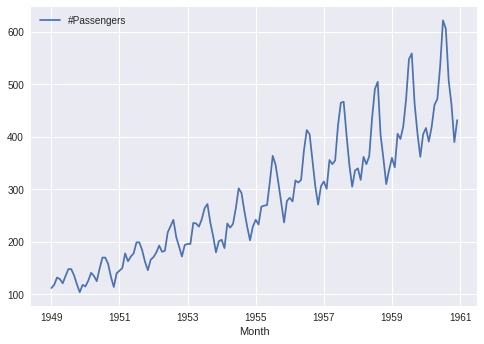

In [6]:
dataset.plot()

There is a trend so obviously the data is not stationary.

##Augmented Dickey Fuller Test : 

**Null Hypothesis**: The series has a unit root (value of a =1) (Not stationary)

**Alternate Hypothesis**: The series has no unit root.

In [0]:
#function for ADF(Augmented Dickey-Fuller test)
def adf_test(time_series):
  print('Results of ADF test')
  dftest = adfuller(time_series, autolag = 'AIC')
  dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p value', 'No of Lags used', 'No of Observations'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
  print(dfoutput)

In [10]:
#applying the test
adf_test(dataset['#Passengers'])

Results of ADF test
Test Statistics           0.815369
p value                   0.991880
No of Lags used          13.000000
No of Observations      130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


**Test for stationarity:** If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

In our above example, the test statistic > critical value, which implies that the series is not stationary. This confirms our original observation which we initially saw in the visual test.

##KPSS Test

The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.

**Null Hypothesis:** The process is trend stationary.

**Alternate Hypothesis**: The series has a unit root (series is not stationary).

In [0]:
#Fnction for KPSS test
def kpss_test(time_series):
  print('Results of KPSS test:')
  kpss_test = kpss(time_series, regression = 'c')
  kpss_output = pd.Series(kpss_test[0:3], index = ['Test Statistics','p-Value','No of Lags Used'])
  for key, value in kpss_test[3].items():
    kpss_output['Critical Value (%s)'%key] = value
  print(kpss_output)

In [12]:
#Running the kpss test
kpss_test(dataset['#Passengers'])

Results of KPSS test:
Test Statistics           1.052175
p-Value                   0.010000
No of Lags Used          14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


 If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary). For the air passenger data, the value of the test statistic is greater than the critical value at all confidence intervals, and hence we can say that the series is not stationary.

**So in summary, the ADF test has an alternate hypothesis of linear or difference stationary, while the KPSS test identifies trend-stationarity in a series.**

#Types of Stationarity

Let us understand the different types of stationarities and how to interpret the results of the above tests.

**Strict Stationary:** A strict stationary series satisfies the mathematical definition of a stationary process. For a strict stationary series, the mean, variance and covariance are not the function of time. The aim is to convert a non-stationary series into a strict stationary series for making predictions.

**Trend Stationary**: A series that has no unit root but exhibits a trend is referred to as a trend stationary series. Once the trend is removed, the resulting series will be strict stationary. The KPSS test classifies a series as stationary on the absence of unit root. This means that the series can be strict stationary or trend stationary.
    
**Difference Stationary**: A time series that can be made strict stationary by differencing falls under difference stationary. ADF test is also known as a difference stationarity test.

It’s always better to apply both the tests, so that we are sure that the series is truly stationary. Let us look at the possible outcomes of applying these stationary tests.

   **Case 1:** Both tests conclude that the series is not stationary -> series is not stationary
    
  ** Case 2**: Both tests conclude that the series is stationary -> series is stationary
   
 ** Case 3:** KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary
  
 ** Case 4:** KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary


#Making a Time Series Stationary

Now that we are familiar with the concept of stationarity and its different types, we can finally move on to actually making our series stationary. Always keep in mind that in order to use time series forecasting models, it is necessary to convert any non-stationary series to a stationary series first.

 
##Differencing

In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:

yt‘ = yt – y(t-1)

where yt is the value at a time t

##Seasonal Differencing

In seasonal differencing, instead of calculating the difference between consecutive values, we calculate the difference between an observation and a previous observation from the same season. For example, an observation taken on a Monday will be subtracted from an observation taken on the previous Monday. Mathematically it can be written as:

yt‘ = yt – y(t-n)

##Transformation

Transformations are used to stabilize the non-constant variance of a series. Common transformation methods include power transform, square root, and log transform